<a href="https://colab.research.google.com/github/SiyumiJayawardhane/OralCancerEarlyDetection-DSGP/blob/Prediction-of-textual-data-I/Patient_Risk_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib
from keras.models import Sequential
from keras.layers import Dense
import shap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load The Dataset
data=pd.read_csv("/content/drive/MyDrive/DSGP/Siyumi/Modelnew/new/preprocessed_new_dataset.csv")

In [ ]:
data.head()

,Gender_Female,Gender_Male,Tobacco_Use_No,Tobacco_Use_Yes,Alcohol_Use_No,Alcohol_Use_Yes,Socioeconomic_Status_High,Socioeconomic_Status_Low,Socioeconomic_Status_Middle,HPV_Related_No,HPV_Related_Yes,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_South America,Age_group_Middle,Age_group_Older,Age_group_Young
0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1
1,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0
2,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
3,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0
4,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1


In [ ]:
data.shape

(64653, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64653 entries, 0 to 64652
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Gender_Female                64653 non-null  int64
 1   Gender_Male                  64653 non-null  int64
 2   Tobacco_Use_No               64653 non-null  int64
 3   Tobacco_Use_Yes              64653 non-null  int64
 4   Alcohol_Use_No               64653 non-null  int64
 5   Alcohol_Use_Yes              64653 non-null  int64
 6   Socioeconomic_Status_High    64653 non-null  int64
 7   Socioeconomic_Status_Low     64653 non-null  int64
 8   Socioeconomic_Status_Middle  64653 non-null  int64
 9   HPV_Related_No               64653 non-null  int64
 10  HPV_Related_Yes              64653 non-null  int64
 11  Continent_Africa             64653 non-null  int64
 12  Continent_Asia               64653 non-null  int64
 13  Continent_Europe             64653 non-null  i

**Check Mulitocollinearity**

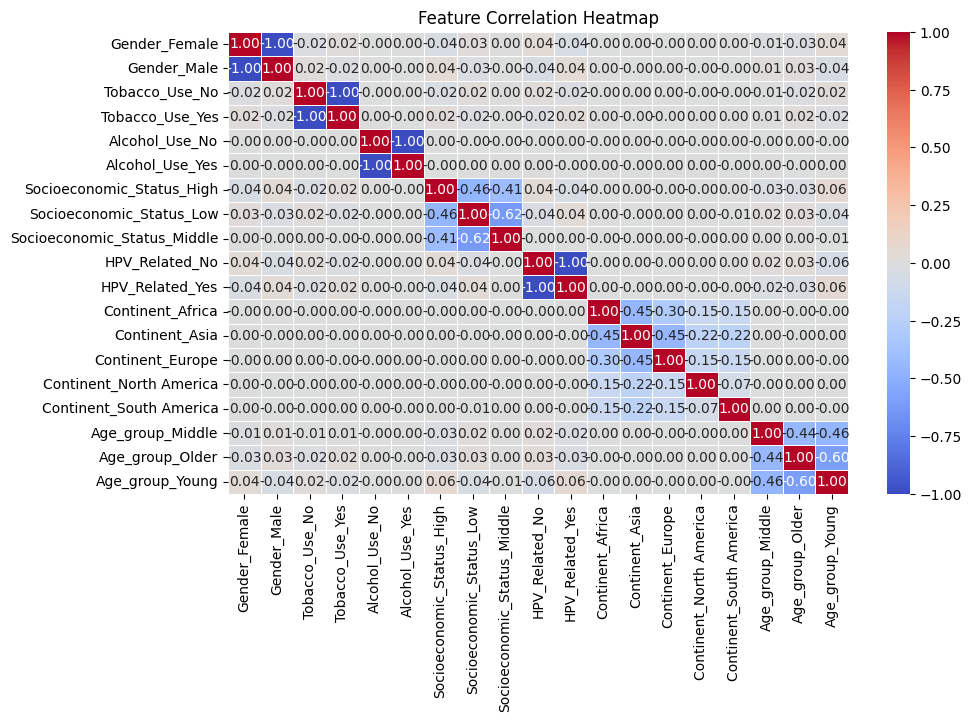

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#Feature selection for clustering
features = ['Gender_Male','Tobacco_Use_Yes', 'Alcohol_Use_Yes','Socioeconomic_Status_Low' ,'Socioeconomic_Status_Middle','HPV_Related_Yes','Age_group_Middle','Age_group_Older','Continent_Asia']
X = data[features]

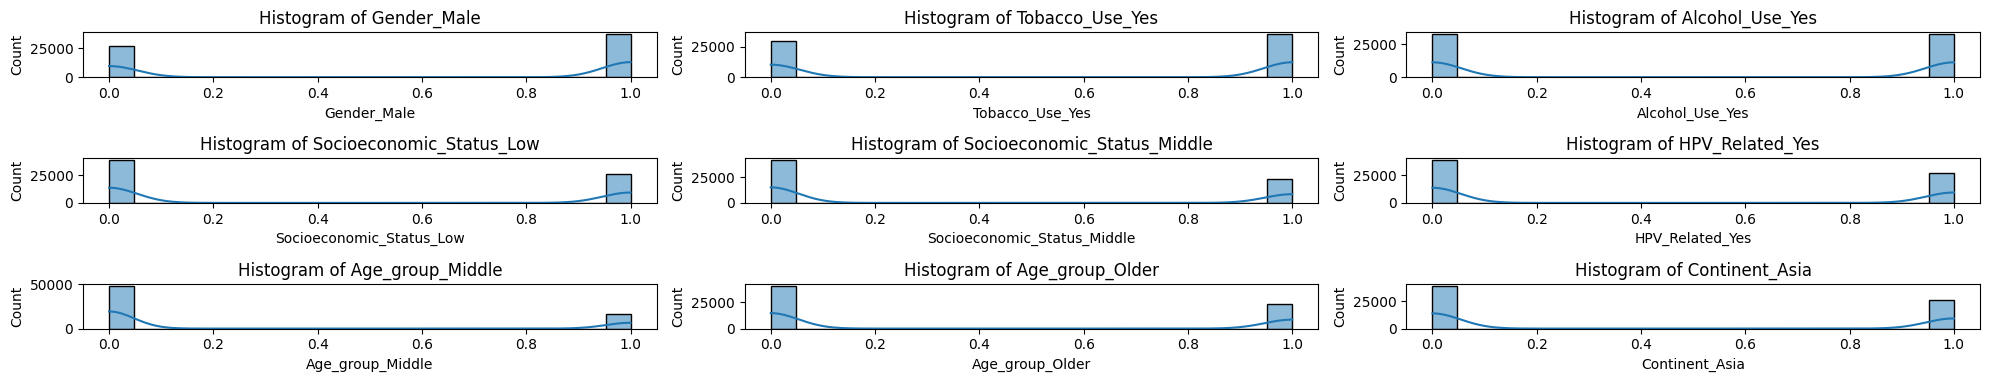

In [ ]:
# Plot histogram for each feature
plt.figure(figsize=(20,6))

for i, feature in enumerate(features, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

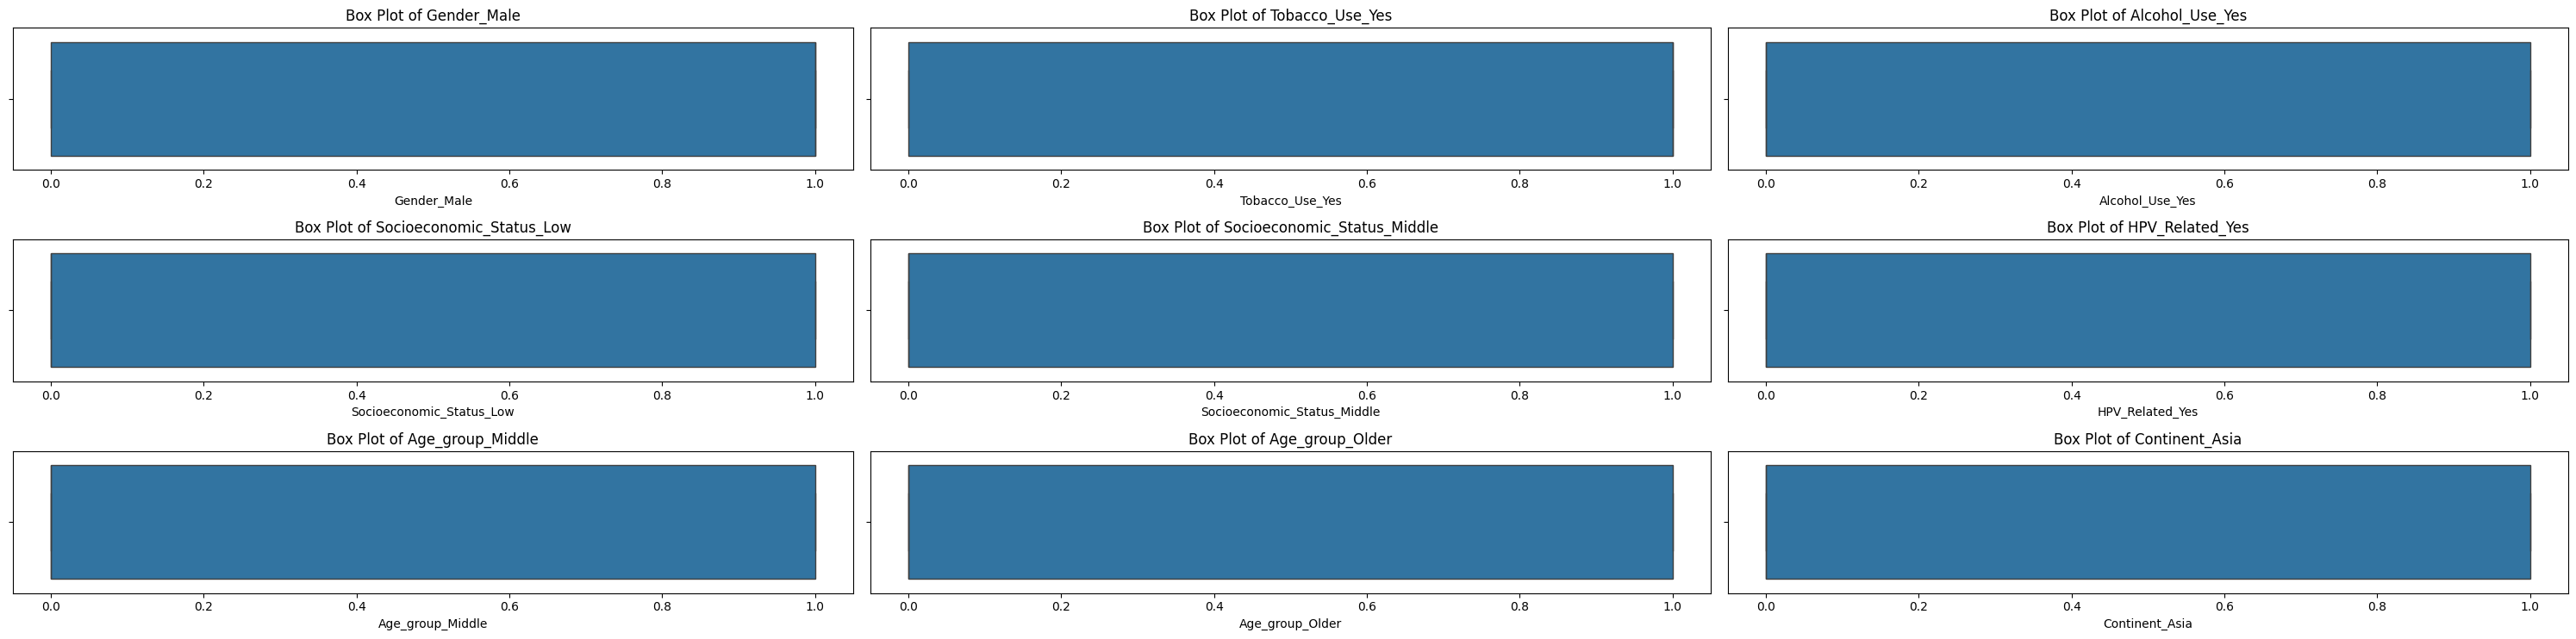

In [ ]:
# Box plot for features
plt.figure(figsize=(30,12))

for i, feature in enumerate(features, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

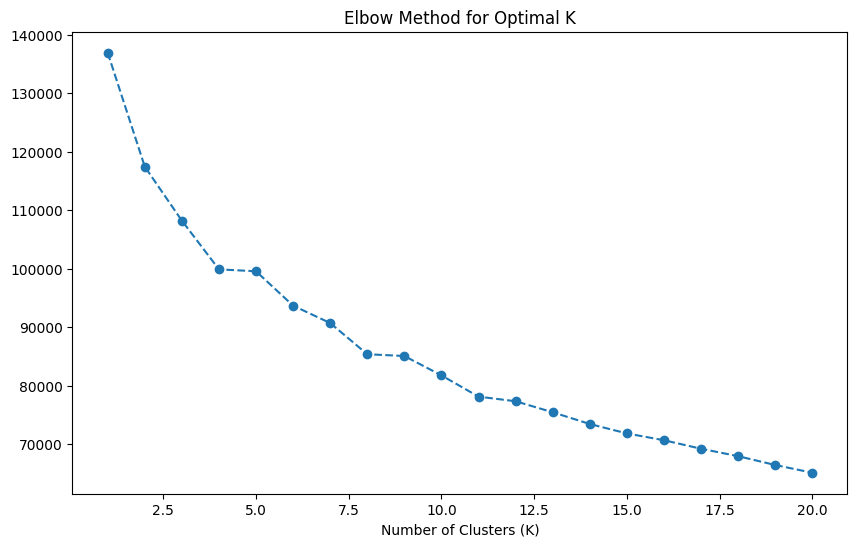

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[features])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define range of K values to test
k_values = [2, 3, 4, 5, 6 ]

# Dictionary to store silhouette scores
silhouette_scores = {}

# Loop through different values of K and compute silhouette scores
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)  # X is your feature dataset

    # Compute silhouette score
    score = silhouette_score(X, cluster_labels)
    silhouette_scores[k] = score
    print(f"Silhouette Score for K={k}: {score:.4f}")

# Find the best K with highest silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nBest K based on silhouette score: {best_k}")

Silhouette Score for K=2: 0.1556
Silhouette Score for K=3: 0.1425
Silhouette Score for K=4: 0.1405
Silhouette Score for K=5: 0.1387
Silhouette Score for K=6: 0.1480

Best K based on silhouette score: 2


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define range of K values to test
k_values = [7,8,9,10 ]

# Dictionary to store silhouette scores
silhouette_scores = {}

# Loop through different values of K and compute silhouette scores
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)  # X is your feature dataset

    # Compute silhouette score
    score = silhouette_score(X, cluster_labels)
    silhouette_scores[k] = score
    print(f"Silhouette Score for K={k}: {score:.4f}")

# Find the best K with highest silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nBest K based on silhouette score: {best_k}")

Silhouette Score for K=7: 0.1328
Silhouette Score for K=8: 0.1437
Silhouette Score for K=9: 0.1293
Silhouette Score for K=10: 0.1364

Best K based on silhouette score: 8


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=1000)
kmeans.fit_predict(data[features])

data['Cluster'] = kmeans.labels_

In [ ]:
print(data["Cluster"].value_counts())

Cluster
0    23266
1    21062
2    20325
Name: count, dtype: int64


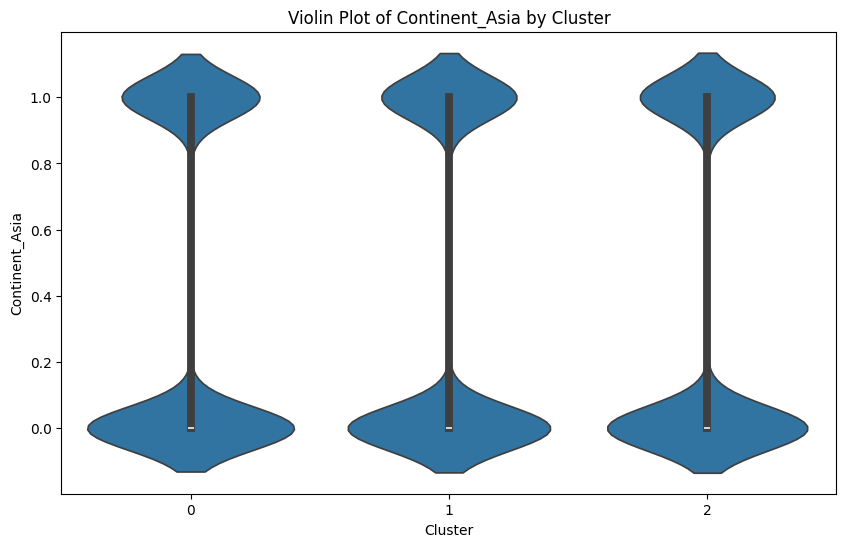

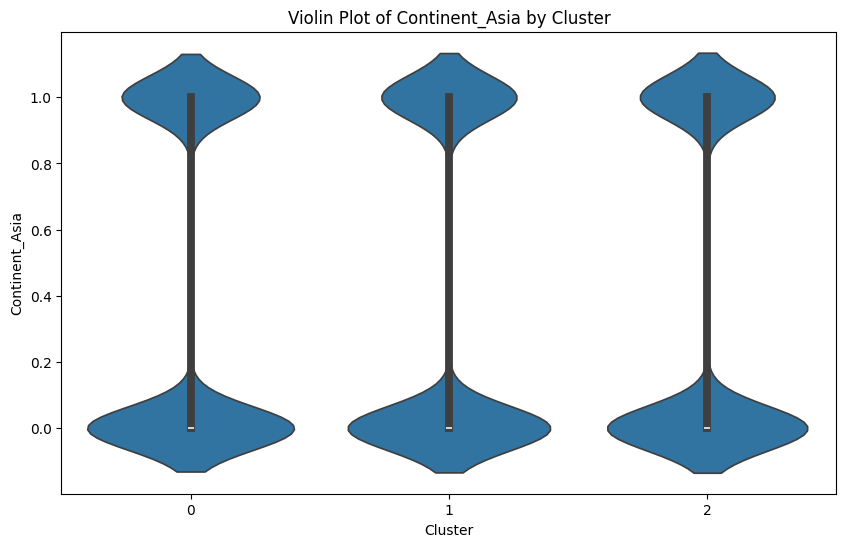

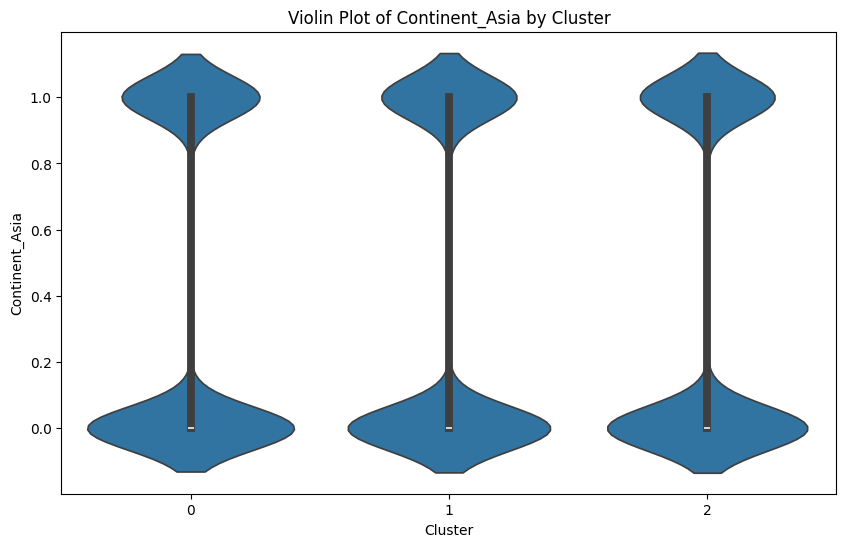

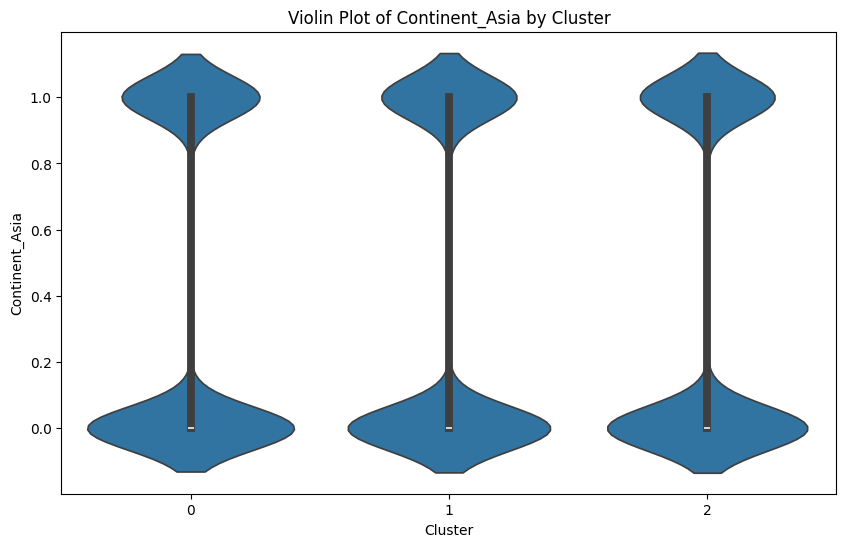

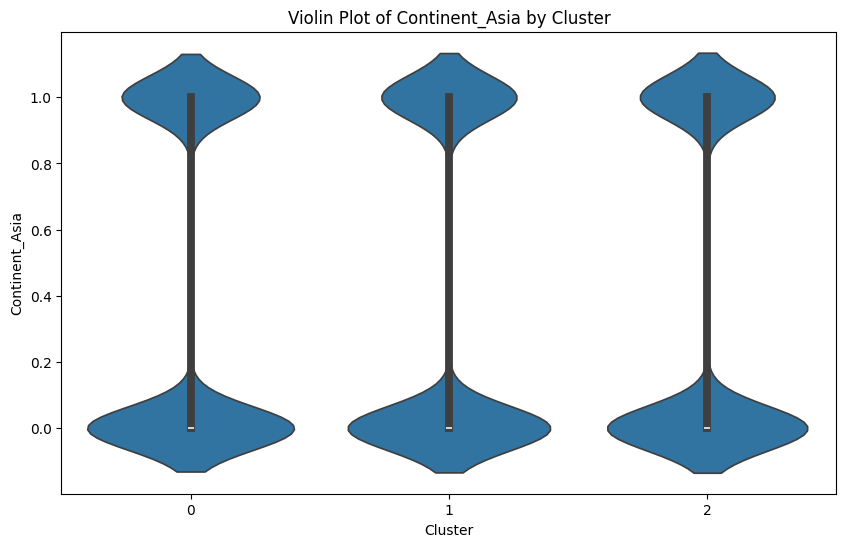

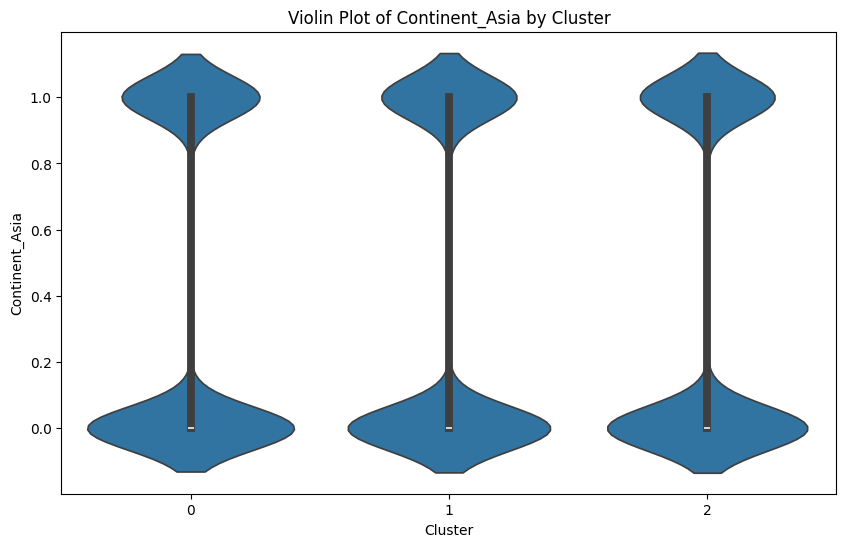

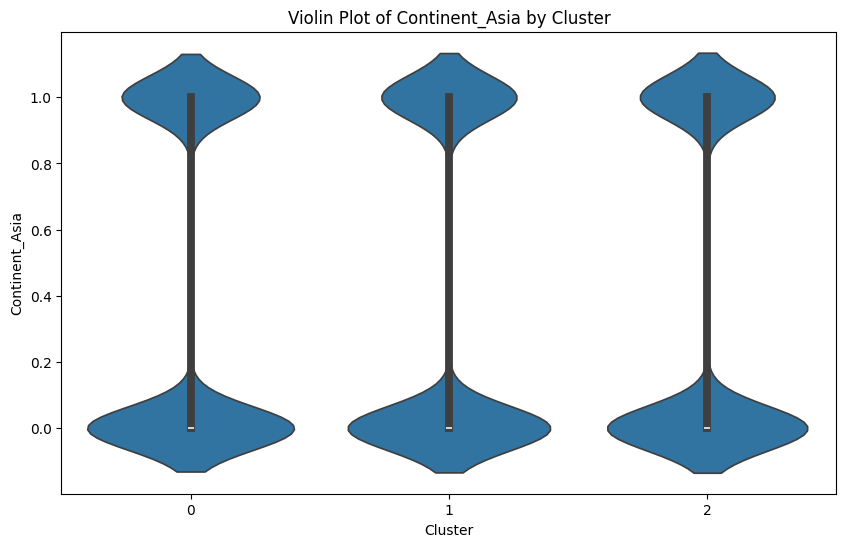

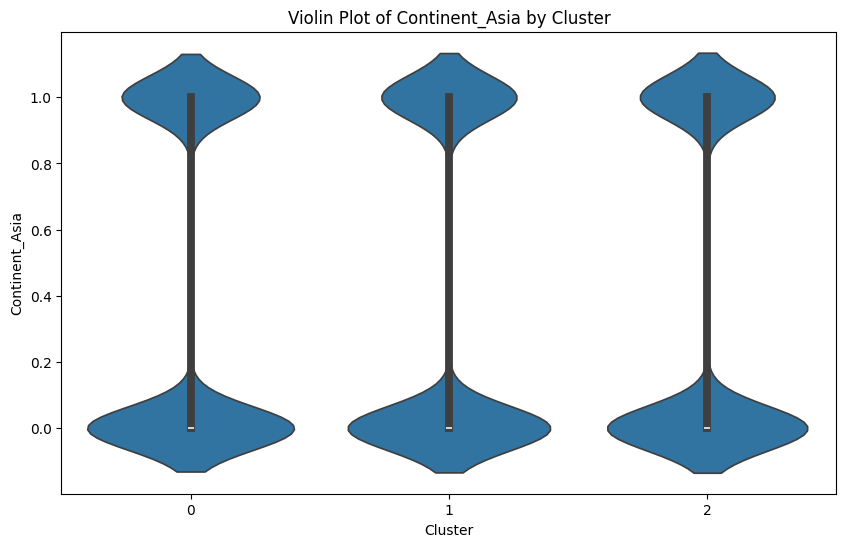

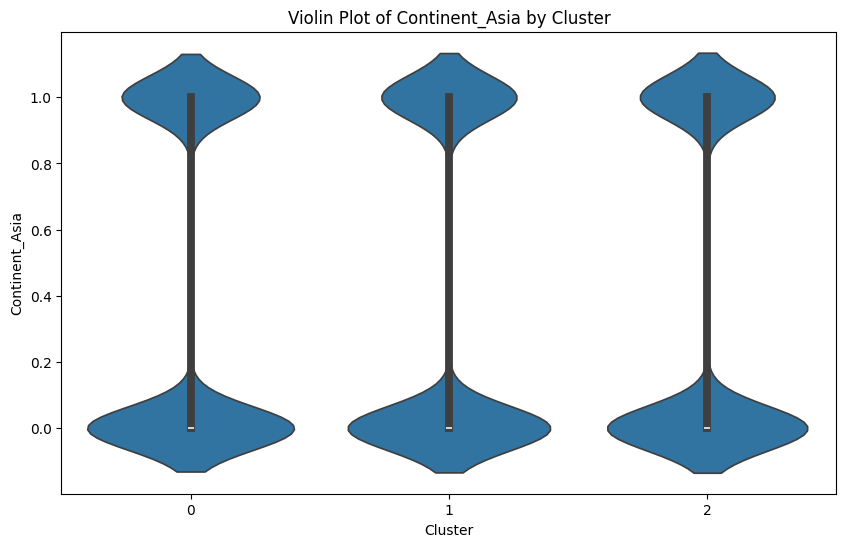

In [ ]:
# Display violin plot
data["Cluster"] = kmeans.labels_

for features in features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Cluster', y=feature, data=data)
    plt.title(f'Violin Plot of {feature} by Cluster')
    plt.xlabel('Cluster')

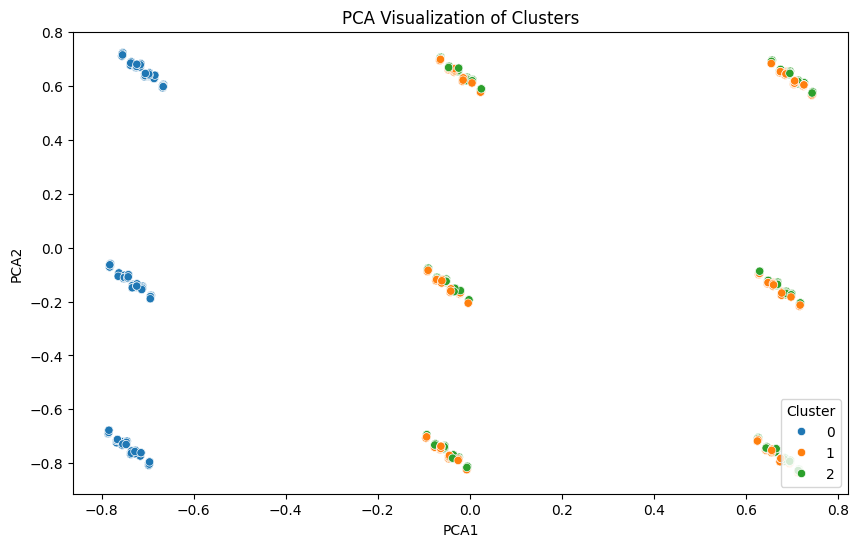

In [ ]:
# Visualize with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
data["PCA1"] = X_pca[:, 0]
data["PCA2"] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=data, palette="tab10")
plt.title('PCA Visualization of Clusters')
plt.show()

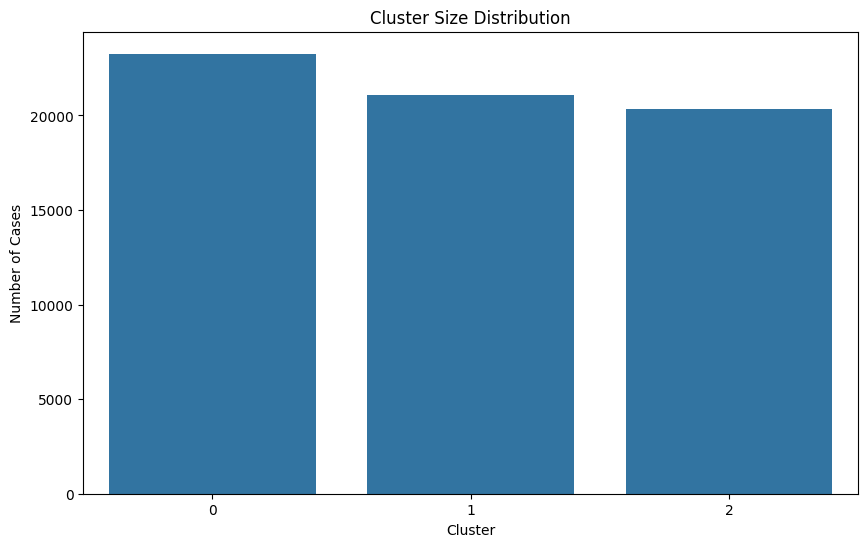

In [ ]:
# Count the number of cases per cluster
cluster_counts = data['Cluster'].value_counts()

# Bar chart of cluster sizes
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Cases')
plt.title('Cluster Size Distribution')
plt.show()

,Gender_Male,Tobacco_Use_Yes,Alcohol_Use_Yes,Socioeconomic_Status_Low,Socioeconomic_Status_Middle,HPV_Related_Yes,Age_group_Older
Cluster,,,,,,,
0,0.244759,0.248258,0.250011,0.000000,0.0,0.241613,0.232712
1,0.220323,0.248083,0.191031,0.232122,0.0,0.134086,0.232514
2,0.138978,0.248067,0.186366,0.231364,0.0,0.223514,0.232016


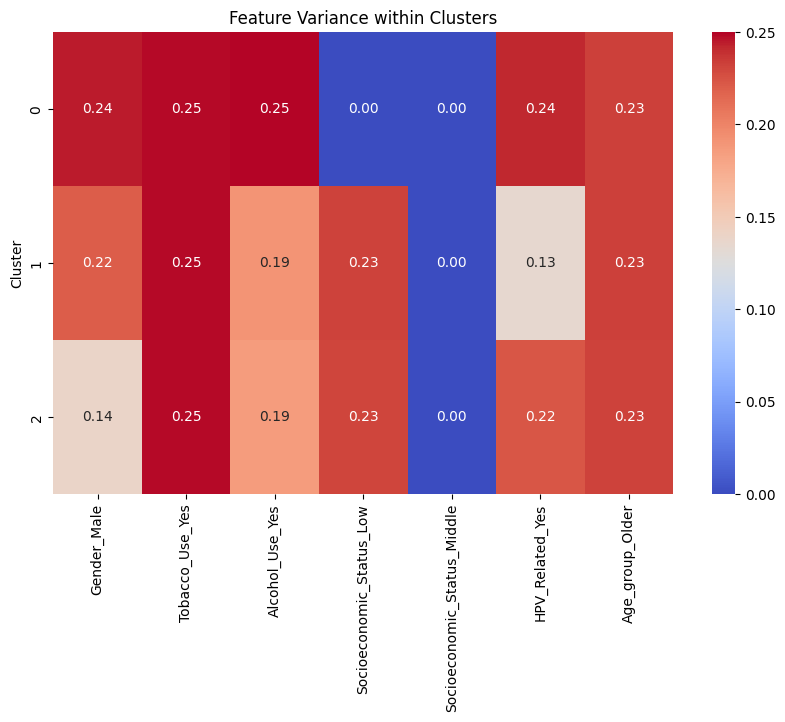

In [ ]:
# import seaborn
import seaborn as sns

# Calculate feature variance within clusters
features = ['Gender_Male','Tobacco_Use_Yes', 'Alcohol_Use_Yes','Socioeconomic_Status_Low' ,'Socioeconomic_Status_Middle','HPV_Related_Yes','Age_group_Older']
cluster_variance = data.groupby('Cluster')[features].var()
display(cluster_variance)

# Visualize feature variance across clusters
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_variance, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Variance within Clusters')
plt.show()

In [ ]:
# Define cluster-to-risk mapping
cluster_risk_mapping = {
    0: "High Risk",
    1: "Low Risk",
    2: "Medium Risk",

}

# Assuming 'Cluster' column already exists in the dataset after clustering
data["Risk_Level"] = data["Cluster"].map(cluster_risk_mapping)

In [ ]:
data.head(10)

,Gender_Female,Gender_Male,Tobacco_Use_No,Tobacco_Use_Yes,Alcohol_Use_No,Alcohol_Use_Yes,Socioeconomic_Status_High,Socioeconomic_Status_Low,Socioeconomic_Status_Middle,HPV_Related_No,...,Continent_Europe,Continent_North America,Continent_South America,Age_group_Middle,Age_group_Older,Age_group_Young,Cluster,PCA1,PCA2,Risk_Level
0,0,1,0,1,0,1,1,0,0,1,...,0,0,0,0,0,1,1,-0.090384,-0.084191,Low Risk
1,1,0,0,1,0,1,1,0,0,1,...,1,0,0,0,1,0,1,-0.032904,0.655952,Low Risk
2,1,0,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,-0.684826,0.631731,High Risk
3,0,1,0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,-0.784723,-0.685734,High Risk
4,0,1,0,1,0,1,0,0,1,1,...,1,0,0,0,0,1,0,-0.781458,-0.067762,High Risk
5,0,1,0,1,1,0,1,0,0,1,...,0,0,0,0,0,1,2,-0.091189,-0.080210,Medium Risk
6,1,0,0,1,0,1,0,1,0,1,...,0,0,1,0,0,1,1,0.660579,-0.138291,Low Risk
7,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0.725319,0.599817,Low Risk
8,1,0,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0.676327,-0.782294,Low Risk
9,1,0,1,0,0,1,0,0,1,1,...,0,0,1,1,0,0,0,-0.735520,-0.762702,High Risk


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64653 entries, 0 to 64652
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender_Female                64653 non-null  int64  
 1   Gender_Male                  64653 non-null  int64  
 2   Tobacco_Use_No               64653 non-null  int64  
 3   Tobacco_Use_Yes              64653 non-null  int64  
 4   Alcohol_Use_No               64653 non-null  int64  
 5   Alcohol_Use_Yes              64653 non-null  int64  
 6   Socioeconomic_Status_High    64653 non-null  int64  
 7   Socioeconomic_Status_Low     64653 non-null  int64  
 8   Socioeconomic_Status_Middle  64653 non-null  int64  
 9   HPV_Related_No               64653 non-null  int64  
 10  HPV_Related_Yes              64653 non-null  int64  
 11  Continent_Africa             64653 non-null  int64  
 12  Continent_Asia               64653 non-null  int64  
 13  Continent_Europe

In [ ]:
#drop cluster, PCA1, PCA2
data = data.drop(['Cluster','PCA1','PCA2'], axis=1)

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the correct directory and filename
folder_path = "/content/drive/MyDrive/DSGP/Siyumi/Modelnew/new"
file_name = "new_target_dataset_allf.csv"
full_path = os.path.join(folder_path, file_name)

# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Save the dataset
data.to_csv(full_path, index=False)

print(f"Preprocessed dataset saved to: {full_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Preprocessed dataset saved to: /content/drive/MyDrive/DSGP/Siyumi/Modelnew/new/new_target_dataset_allf.csv
